# Incarcerated Days

In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor 
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from matplotlib.pylab import rcParams

In [2]:
# Define the data types for each column
data_types = {
    'nameFull':'str',
    'bookingNumber':'str',
    'caseNumber':'str',
    'inmateNumber':'str',
    'housing1':'str',
    'housing1a':'str',
    'housing2':'str',
    'housing3': 'str',
    'nameLast':'str',
    'nameFirst':'str',
    'nameMiddle':'str',
    'age': 'float',
    'sex': 'category',
    'race': 'category',
    'eyeColor': 'category',
    'hairColor': 'category',
    'height': 'float',
    'weight': 'float',
    'bond': 'float',
    'bail': 'float',
    'topcharge': 'category',
    'county':'category',
    'Top Poliytical': 'category'
}

# Specify which columns should be parsed as datetime
date_columns = ['date', 'bookingDate', 'dob', 'firstappearance']
df = pd.read_csv('CensusJDI.csv',dtype= data_types, parse_dates = date_columns)
df.dropna(subset=['nameFull'], inplace=True)

## Scatter Plot for Bond vs. Incarcerated Days:

Explore the relationship between the bond amount and the number of days incarcerated with a scatter plot.

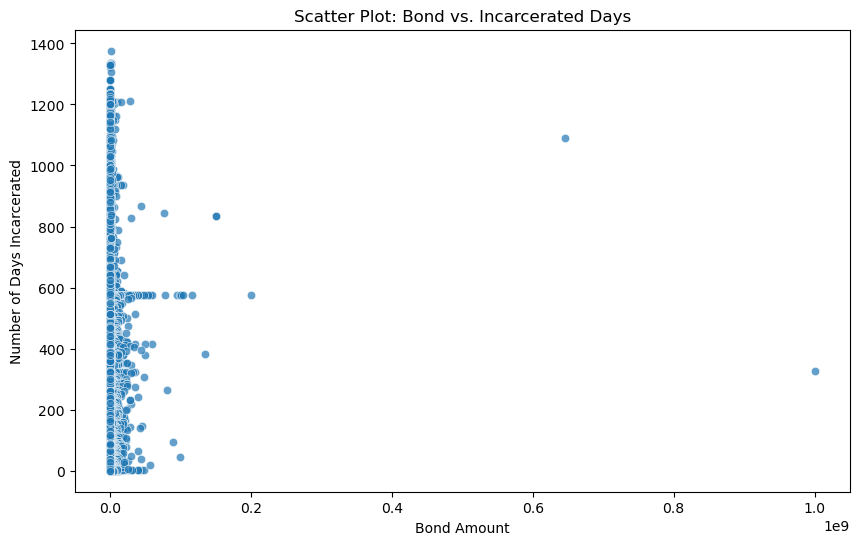

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bond', y='incarcerated_days', data=df, alpha=0.7)

# Set the title and labels
plt.title('Scatter Plot: Bond vs. Incarcerated Days')
plt.xlabel('Bond Amount')
plt.ylabel('Number of Days Incarcerated')

# Display the plot
plt.show()

## Violin Plot of Incarcerated Days by Race

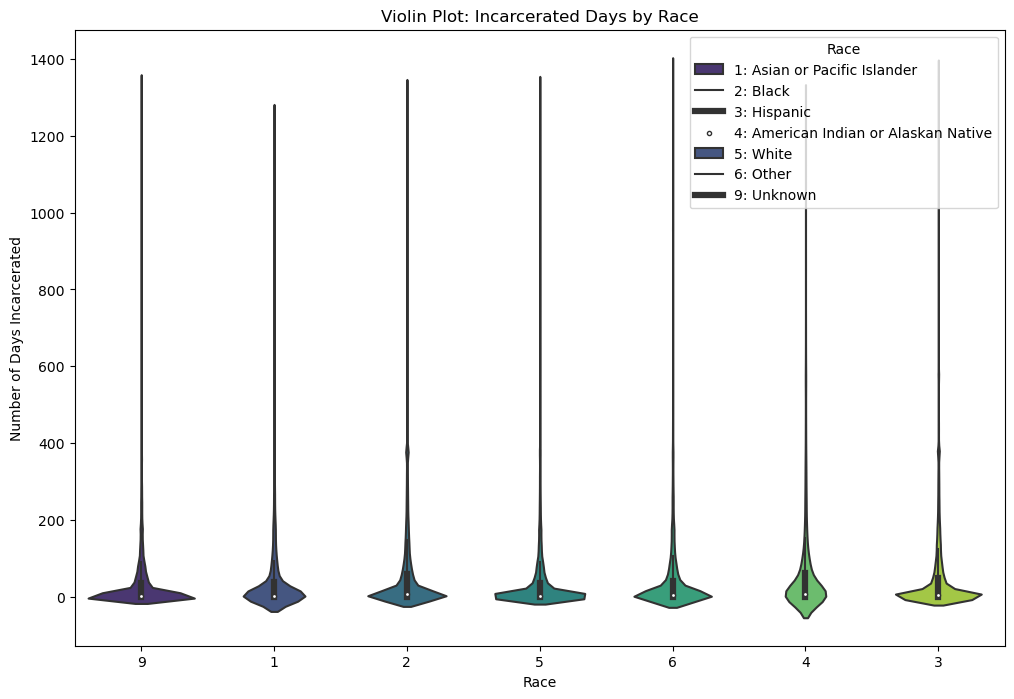

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map race codes to labels
race_mapping = {
    1: 'Asian or Pacific Islander',
    2: 'Black',
    3: 'Hispanic',
    4: 'American Indian or Alaskan Native',
    5: 'White',
    6: 'Other',
    9: 'Unknown'
}

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='race', y='incarcerated_days', data=df, palette='viridis')

# Map top charge codes to labels on the x-axis
#plt.xticks(ticks=range(6), labels=[race_mapping[code] for code in range(1, 7)])

# Set the title and labels
plt.title('Violin Plot: Incarcerated Days by Race')
plt.xlabel('Race')
plt.ylabel('Number of Days Incarcerated')

# Customize legend
legend_labels = [f"{code}: {label}" for code, label in race_mapping.items()]
plt.legend(legend_labels, title='Race', loc='upper right')

# Display the plot
plt.show()


## Barchart of Incarcerated Days by Top Charge

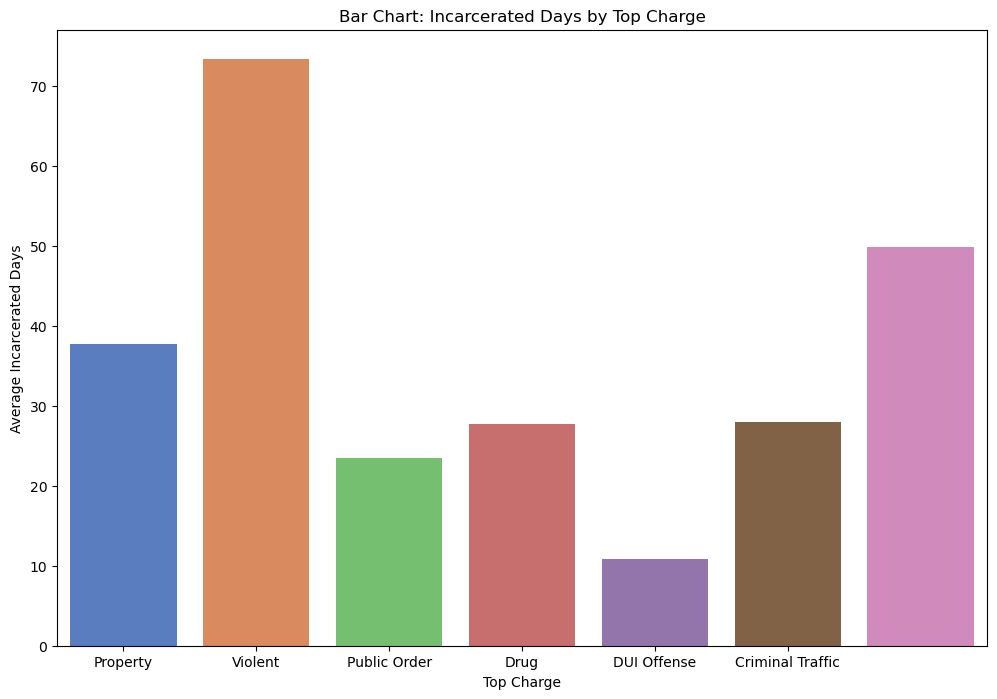

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map top charge codes to labels
top_charge_mapping = {
    1: 'Property',
    2: 'Violent',
    3: 'Public Order',
    4: 'Drug',
    5: 'DUI Offense',
    6: 'Criminal Traffic',
    9: 'Unknown'
}

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='topcharge', y='incarcerated_days', data=df, errorbar = None, palette='muted')

# Map top charge codes to labels on the x-axis
plt.xticks(ticks=range(6), labels=[top_charge_mapping[code] for code in range(1, 7)])

# Set the title and labels
plt.title('Bar Chart: Incarcerated Days by Top Charge')
plt.xlabel('Top Charge')
plt.ylabel('Average Incarcerated Days')

# Display the plot
plt.show()


## Trend line: Poverty Percentage vs Incarcerated Days

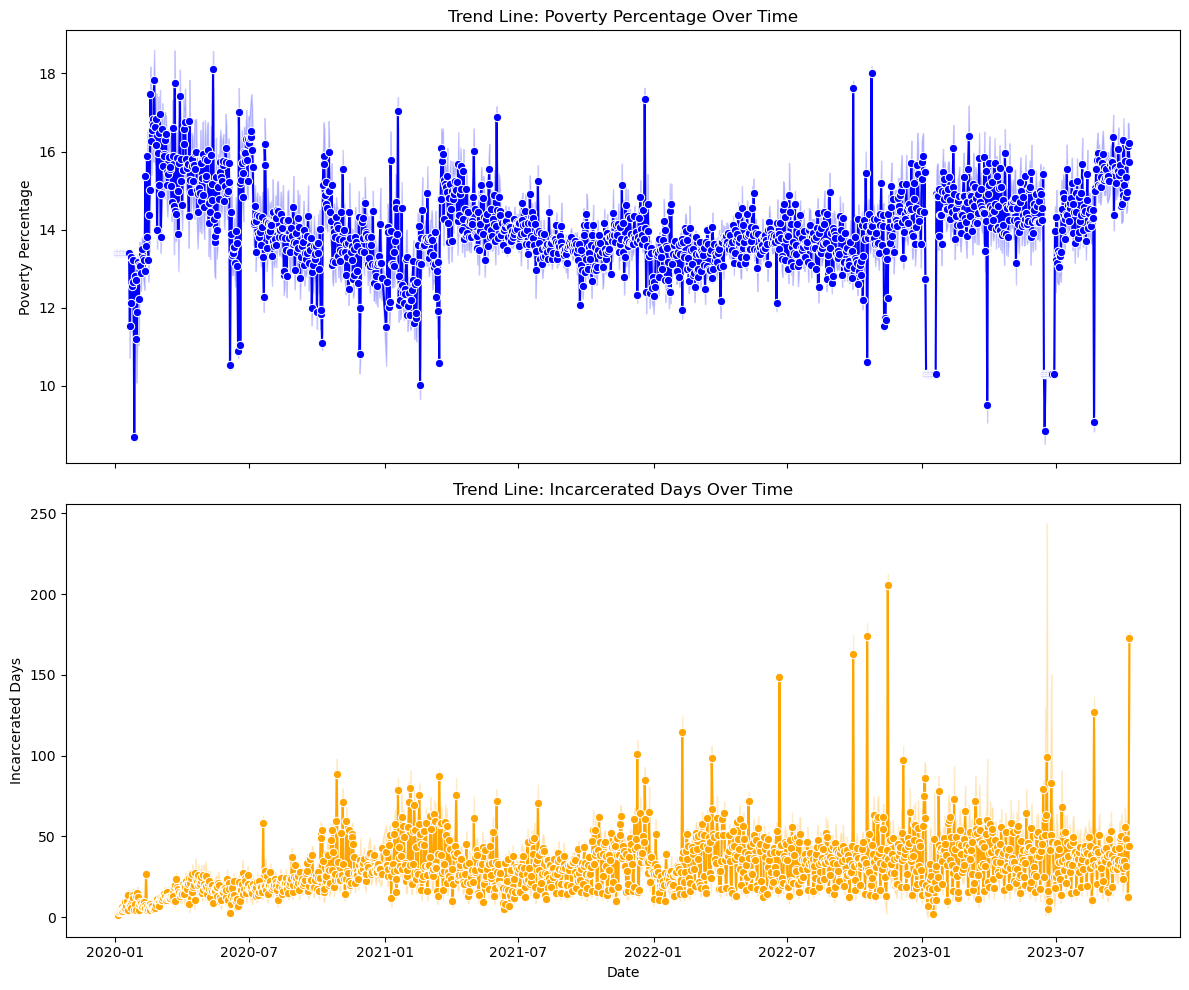

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Trend line for Poverty Percentage
sns.lineplot(ax=axes[0], x='date', y='Poverty %', data=df, marker='o', color='blue')
axes[0].set_title('Trend Line: Poverty Percentage Over Time')
axes[0].set_ylabel('Poverty Percentage')

# Trend line for Incarcerated Days
sns.lineplot(ax=axes[1], x='date', y='incarcerated_days', data=df, marker='o', color='orange')
axes[1].set_title('Trend Line: Incarcerated Days Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Incarcerated Days')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Trend line: Health Coverage vs Incarcerated Days

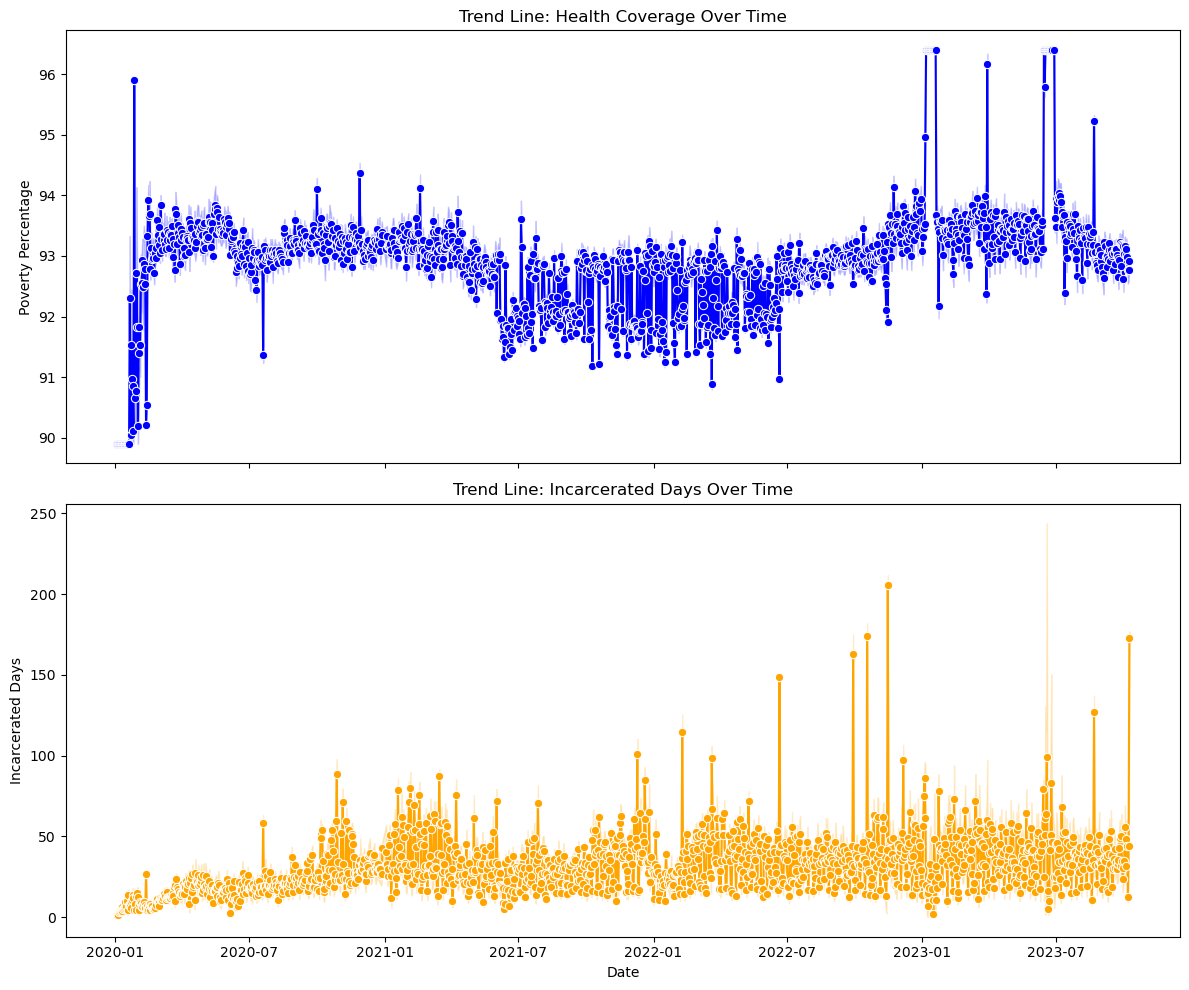

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Trend line for Poverty Percentage
sns.lineplot(ax=axes[0], x='date', y='Health Cov', data=df, marker='o', color='blue')
axes[0].set_title('Trend Line: Health Coverage Over Time')
axes[0].set_ylabel('Poverty Percentage')

# Trend line for Incarcerated Days
sns.lineplot(ax=axes[1], x='date', y='incarcerated_days', data=df, marker='o', color='orange')
axes[1].set_title('Trend Line: Incarcerated Days Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Incarcerated Days')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Pairplot: Unemployment Rates vs. Incarcerated Days

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


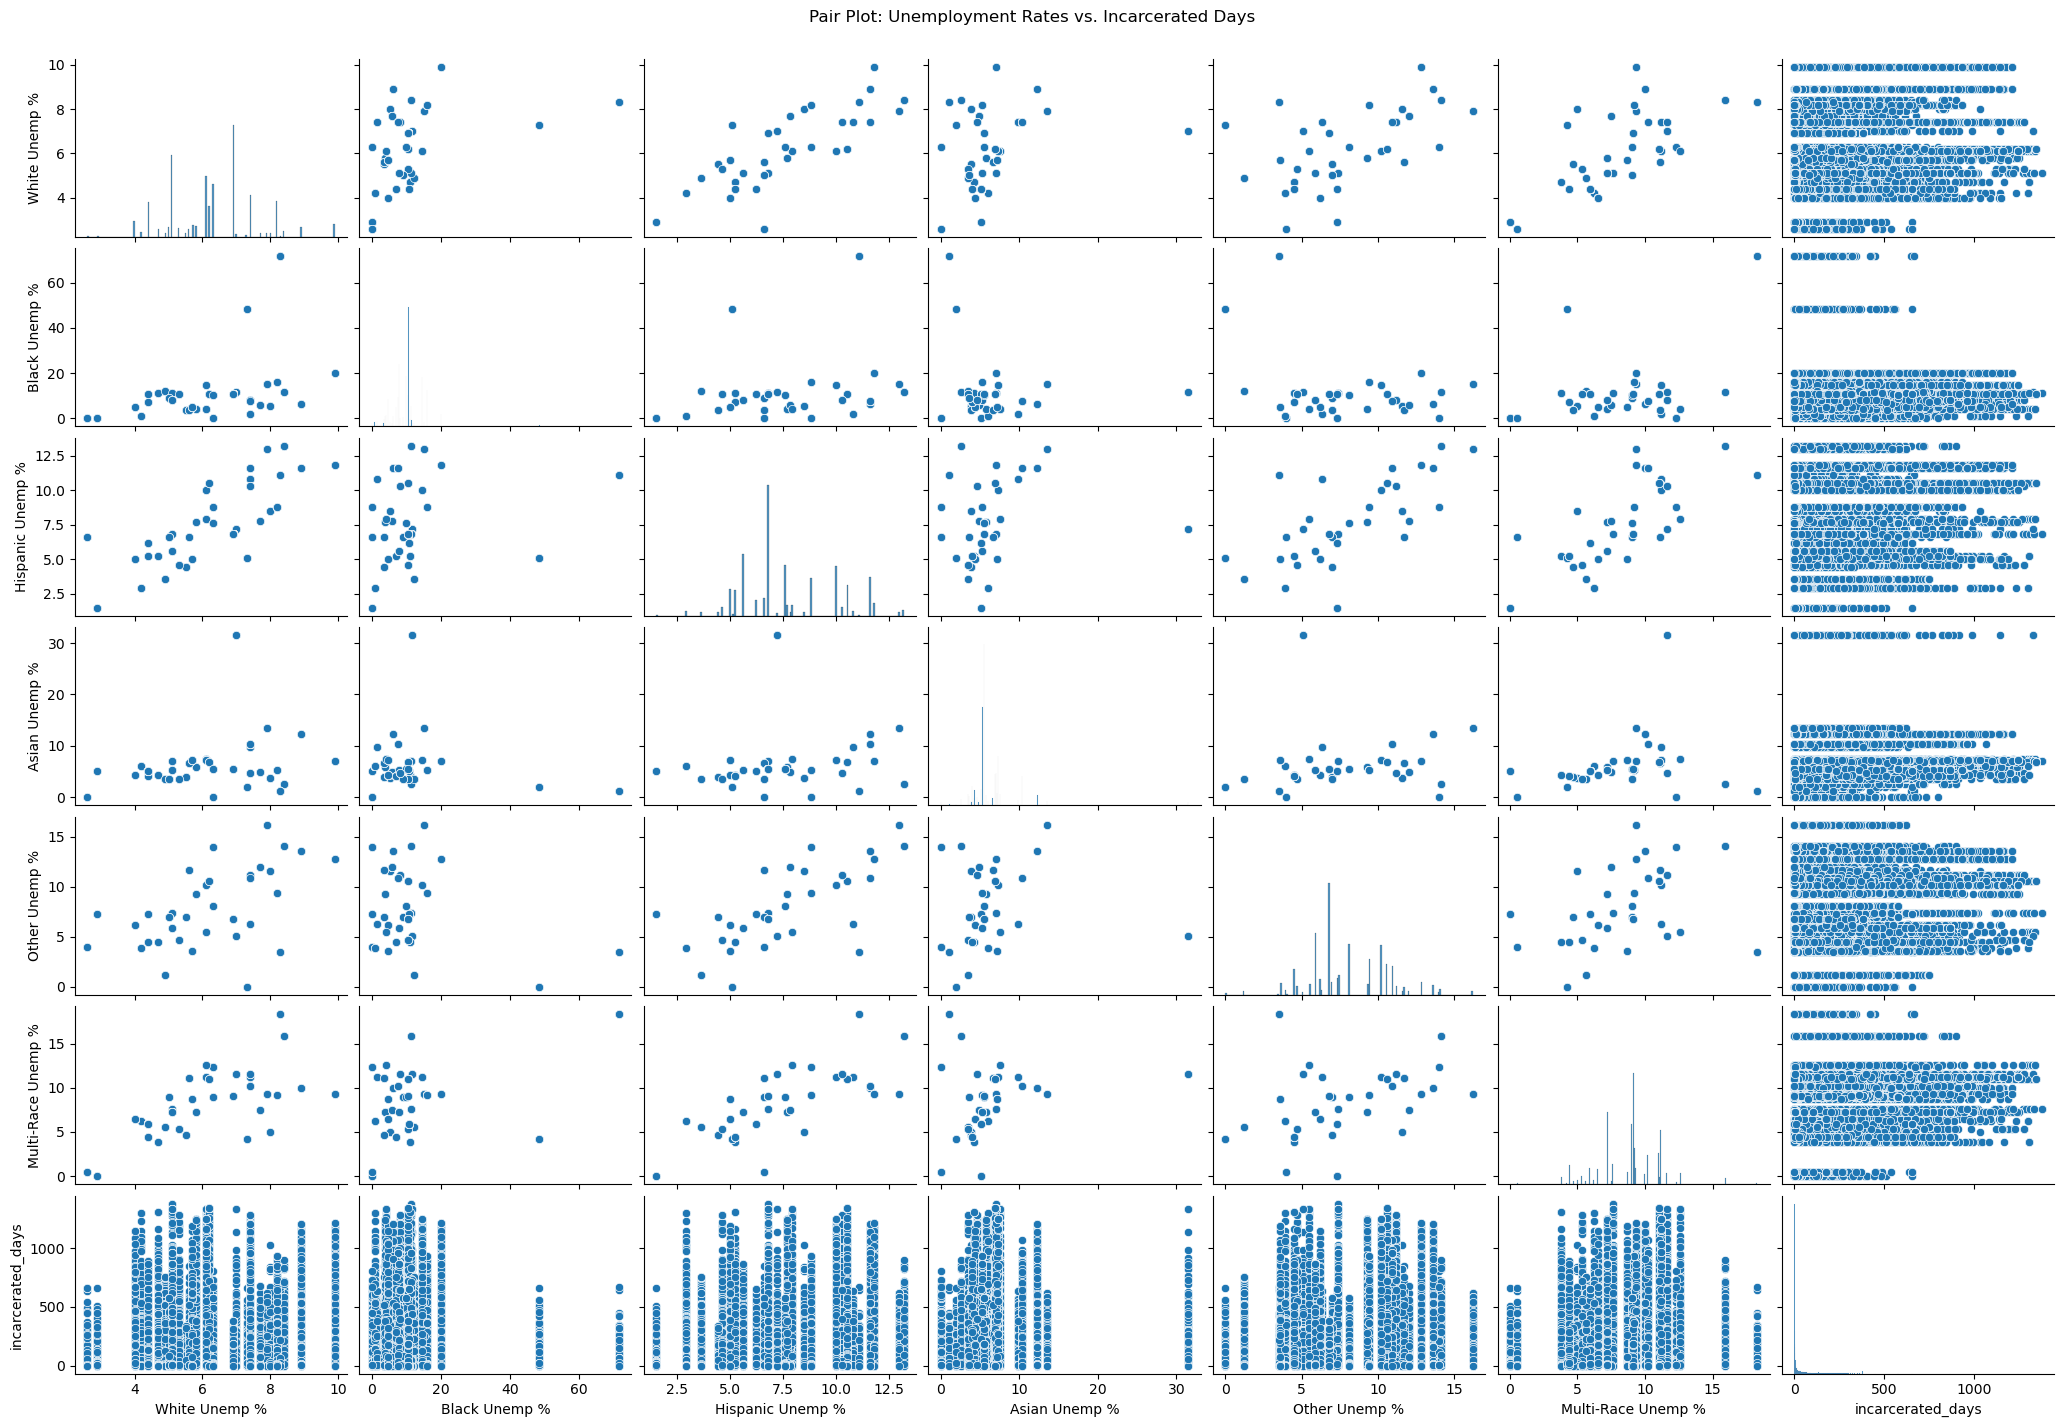

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Select relevant columns
unemployment_columns = ['White Unemp %', 'Black Unemp %', 'Hispanic Unemp %', 'Asian Unemp %', 'Other Unemp %', 'Multi-Race Unemp %']

# Add 'incarcerated_days' to the selected columns
plot_data = df[unemployment_columns + ['incarcerated_days']]

# Create a pair plot without hue
sns.pairplot(plot_data, height=2, aspect=1.5, markers='o')
plt.suptitle('Pair Plot: Unemployment Rates vs. Incarcerated Days', y=1.02)

# Display the plot
plt.show()

# Duration out of Jails

In [3]:
import pandas as pd

# Sort the dataset by 'nameFull' and 'firstappearance'
df = df.sort_values(['nameFull', 'firstappearance'])

# Calculate the difference between 'date' and the next 'firstappearance' for each individual
df['time_gap'] = df.groupby('nameFull')['firstappearance'].shift(-1) - df['date']

# Convert the 'time_gap' column to string
df['time_gap'] = df['time_gap'].astype(str)
df['time_gap'] = df['time_gap'].str.replace(' days', '', regex=False)

# Replace "NaT" with 0 in the 'time_gap' column
df['time_gap'] = df['time_gap'].replace('NaT', 0)

# Convert the 'time_gap' column to integers
df['time_gap'] = df['time_gap'].astype(int)

incarceration_count = {}

for index, row in df.iterrows():
    name = str(row['nameFull']).strip() if not pd.isna(row['nameFull']) else None
    if name:
        if name in incarceration_count:
            incarceration_count[name] += 1
        else:
            incarceration_count[name] = 1

# Create a new column 'incarcerated_counts' based on the counts
df['incarcerated_counts'] = df['nameFull'].apply(lambda x: incarceration_count.get(str(x).strip(), 0) 
                                                 if not pd.isna(x) else 0)


# Add a new column reincarcerated base on reincarcerated_counts
df['reincarceration'] = df['incarcerated_counts'].apply(lambda x: 1 if x > 1 else 0)
display(df)

nameFull bookingNumber bookingDate caseNumber inmateNumber  \
428320  (J) BENJAMIN HAYES           NaN  2022-09-24        NaN  202201668.0   
282037   A ALEXANDER BARRY     6099253.0         NaT        NaN          NaN   
206843            A D WEBB     so2294642         NaT        NaN          NaN   
223478            A D WEBB     so2322685         NaT        NaN          NaN   
230145         A D WEBB JR     so2334382         NaT        NaN          NaN   
...                    ...           ...         ...        ...          ...   
453474       ZYRC DAVIS JR     202123900  2021-06-17  210016757          NaN   
332556      ZYRON NEWHOUSE       6285273         NaT        NaN     40113763   
411754    ZYSEAN RAY WAFER     22-003686  2022-08-16        NaN        41599   
411914    ZYSEAN RAY WAFER     22-004084         NaT        NaN        41599   
53471      ZYSHONNE NAPIER           NaN  2020-09-03        NaN          NaN   

                                                 housing1 housing1a housing2  \
428320                                      Napa Co. Jail       NaN      NaN   
282037                                            Unknown       NaN      NaN   
206843  Kern County Central Receiving Facility; Kern C...       NaN      NaN   
223478  Kern County Central Receiving Facility; Kern C...       NaN      NaN   
230145  Kern County Central Receiving Facility; Kern C...       NaN      NaN   
...                                                   ...       ...      ...   
453474                     robert presley detention cente       NaN      NaN   
332556                                            Unknown       NaN      NaN   
411754           Kings Co. Jail; Kings County Branch Jail       NaN      NaN   
411914           Kings Co. Jail; Kings County Branch Jail       NaN      NaN   
53471                            adult pre-trial facility       NaN      NaN   

       housing3  nameLast  ... Male Unemp % Female Unemp %  LTHS Unemp %  \
428320      NaN       NaN  ...          4.5            4.7           5.7   
282037      NaN     barry  ...          6.5            6.8           6.8   
206843      NaN      webb  ...          8.4            8.2          10.0   
223478      NaN      webb  ...          8.4            8.2          10.0   
230145      NaN      webb  ...          8.4            8.2          10.0   
...         ...       ...  ...          ...            ...           ...   
453474     23c8       NaN  ...          6.3            7.1           7.9   
332556      NaN  newhouse  ...          6.5            6.8           6.8   
411754      NaN       NaN  ...          7.7           10.0          12.9   
411914      NaN     wafer  ...          7.7           10.0          12.9   
53471       NaN       NaN  ...          9.4           10.6          15.4   

       HS Unemp % SC/AD Unemp % Bach./Higher Unemp % Top Political time_gap  \
428320        3.6           4.3                  3.4             D        0   
282037        6.9           6.6                  5.0             D        0   
206843        9.9           6.9                  2.6             R      450   
223478        9.9           6.9                  2.6             R        0   
230145        9.9           6.9                  2.6             R        0   
...           ...           ...                  ...           ...      ...   
453474        7.3           5.7                  3.8             D        0   
332556        6.9           6.6                  5.0             D        0   
411754        8.3           7.3                  3.6             R       17   
411914        8.3           7.3                  3.6             R        0   
53471        12.2           5.9                  3.4             R        0   

        incarcerated_counts  reincarceration  
428320                    1                0  
282037                    1                0  
206843                    2                1  
223478                    2                1  

## Scatter plots for bond vs. Duration out of jails

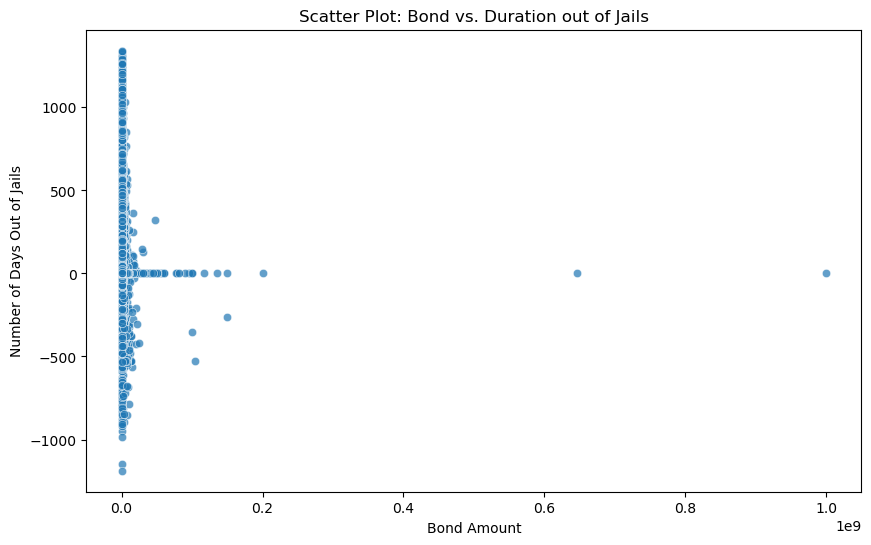

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bond', y='time_gap', data=df, alpha=0.7)

# Set the title and labels
plt.title('Scatter Plot: Bond vs. Duration out of Jails')
plt.xlabel('Bond Amount')
plt.ylabel('Number of Days Out of Jails')

# Display the plot
plt.show()

## Violin Plot of Duration out of Jails by Race

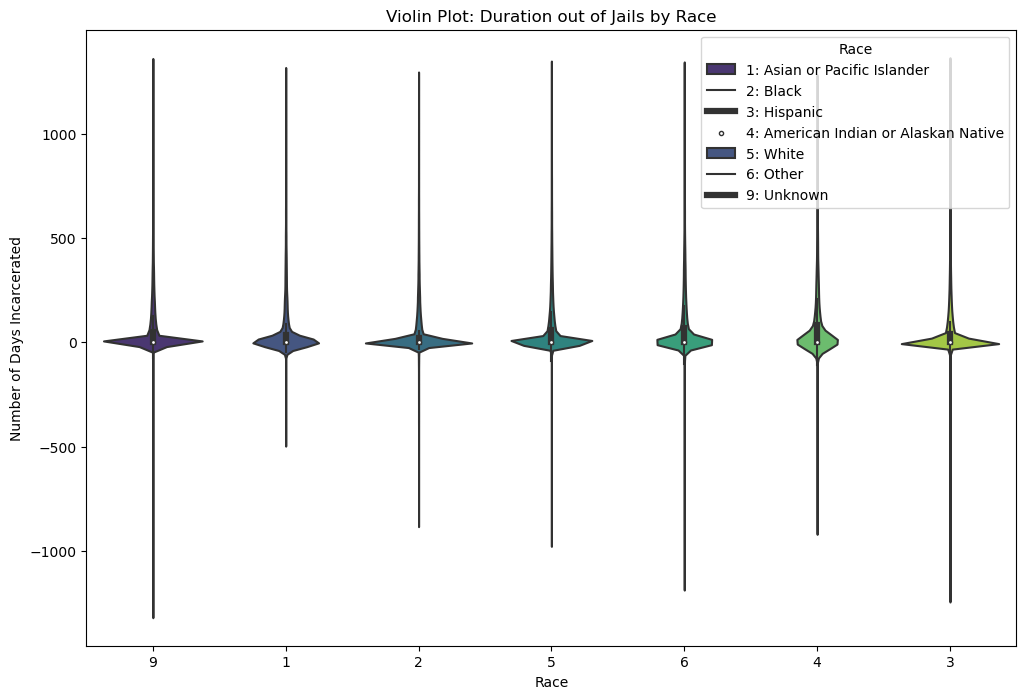

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map race codes to labels
race_mapping = {
    1: 'Asian or Pacific Islander',
    2: 'Black',
    3: 'Hispanic',
    4: 'American Indian or Alaskan Native',
    5: 'White',
    6: 'Other',
    9: 'Unknown'
}

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='race', y='time_gap', data=df, palette='viridis')

# Map top charge codes to labels on the x-axis
#plt.xticks(ticks=range(6), labels=[race_mapping[code] for code in range(1, 7)])

# Set the title and labels
plt.title('Violin Plot: Duration out of Jails by Race')
plt.xlabel('Race')
plt.ylabel('Number of Days Incarcerated')

# Customize legend
legend_labels = [f"{code}: {label}" for code, label in race_mapping.items()]
plt.legend(legend_labels, title='Race', loc='upper right')

# Display the plot
plt.show()

## Barchart of Duration out of Jails vs. Top Charge

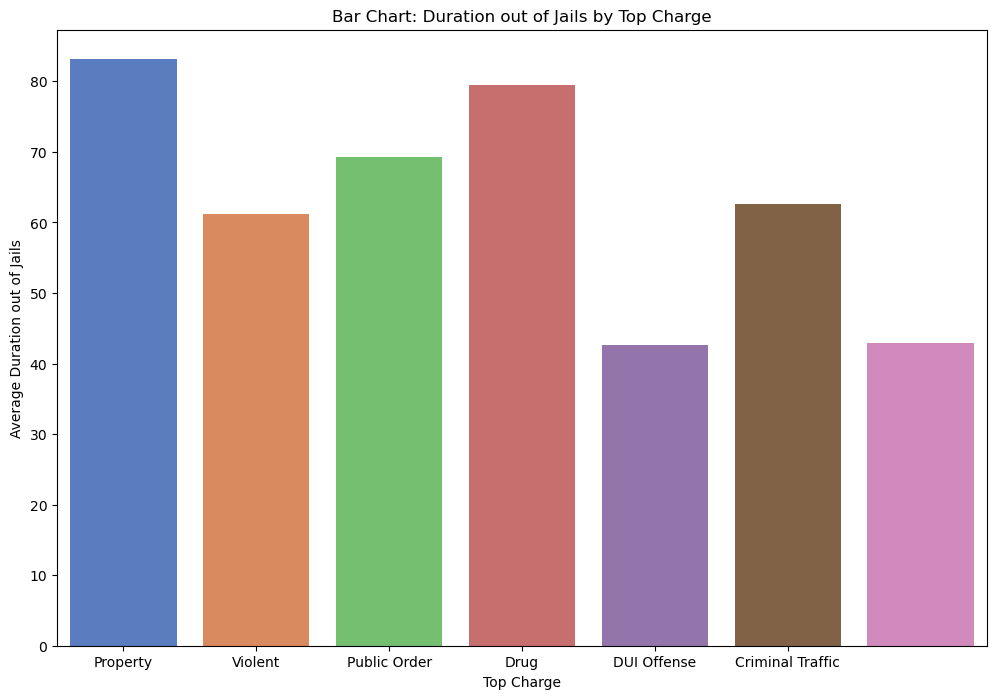

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map top charge codes to labels
top_charge_mapping = {
    1: 'Property',
    2: 'Violent',
    3: 'Public Order',
    4: 'Drug',
    5: 'DUI Offense',
    6: 'Criminal Traffic',
    9: 'Unknown'
}

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='topcharge', y='time_gap', data=df, errorbar = None, palette='muted')

# Map top charge codes to labels on the x-axis
plt.xticks(ticks=range(6), labels=[top_charge_mapping[code] for code in range(1, 7)])

# Set the title and labels
plt.title('Bar Chart: Duration out of Jails by Top Charge')
plt.xlabel('Top Charge')
plt.ylabel('Average Duration out of Jails')

# Display the plot
plt.show()

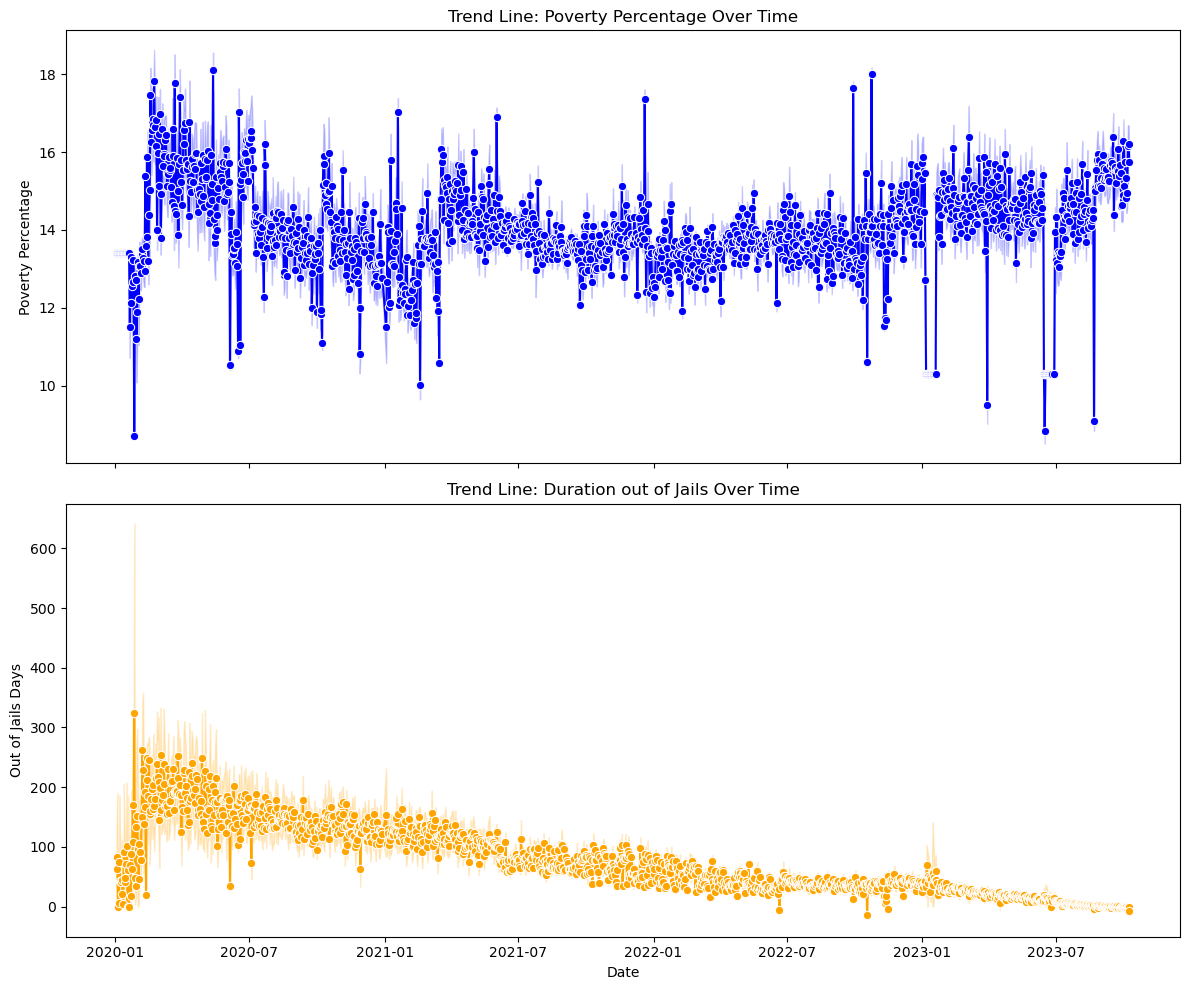

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Trend line for Poverty Percentage
sns.lineplot(ax=axes[0], x='date', y='Poverty %', data=df, marker='o', color='blue')
axes[0].set_title('Trend Line: Poverty Percentage Over Time')
axes[0].set_ylabel('Poverty Percentage')

# Trend line for Incarcerated Days
sns.lineplot(ax=axes[1], x='date', y='time_gap', data=df, marker='o', color='orange')
axes[1].set_title('Trend Line: Duration out of Jails Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Out of Jails Days')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Incarceration Counts

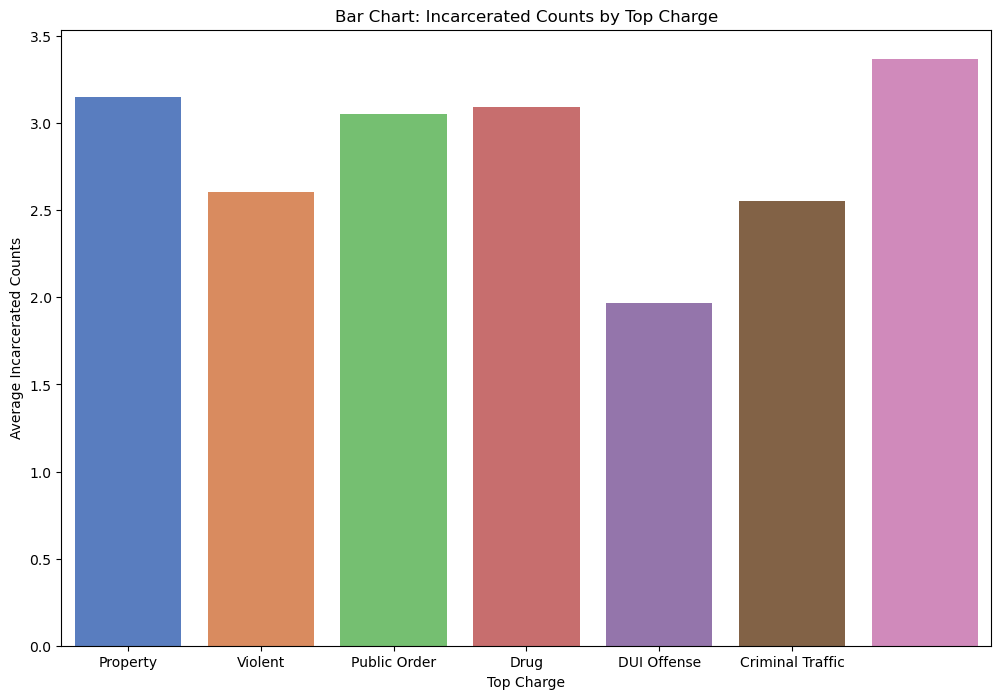

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map top charge codes to labels
top_charge_mapping = {
    1: 'Property',
    2: 'Violent',
    3: 'Public Order',
    4: 'Drug',
    5: 'DUI Offense',
    6: 'Criminal Traffic',
    9: 'Unknown'
}

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='topcharge', y='incarcerated_counts', data=df, errorbar = None, palette='muted')

# Map top charge codes to labels on the x-axis
plt.xticks(ticks=range(6), labels=[top_charge_mapping[code] for code in range(1, 7)])

# Set the title and labels
plt.title('Bar Chart: Incarcerated Counts by Top Charge')
plt.xlabel('Top Charge')
plt.ylabel('Average Incarcerated Counts')

# Display the plot
plt.show()

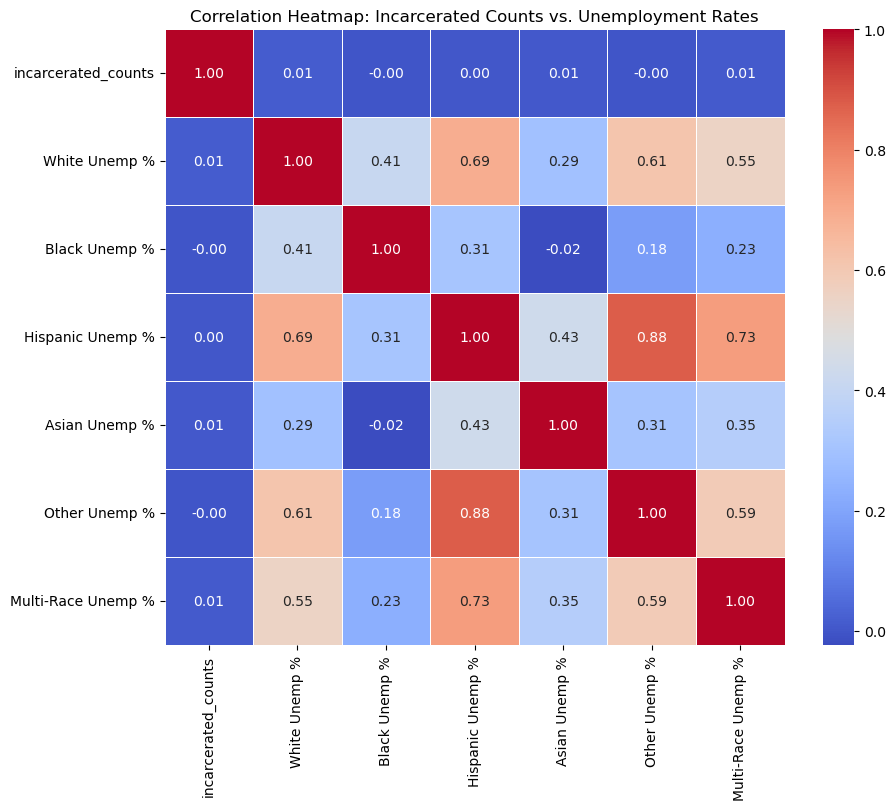

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
columns_of_interest = ['incarcerated_counts', 'White Unemp %', 'Black Unemp %', 'Hispanic Unemp %', 'Asian Unemp %', 'Other Unemp %', 'Multi-Race Unemp %']

# Create a subset of the DataFrame
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set the title
plt.title('Correlation Heatmap: Incarcerated Counts vs. Unemployment Rates')

# Display the plot
plt.show()

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


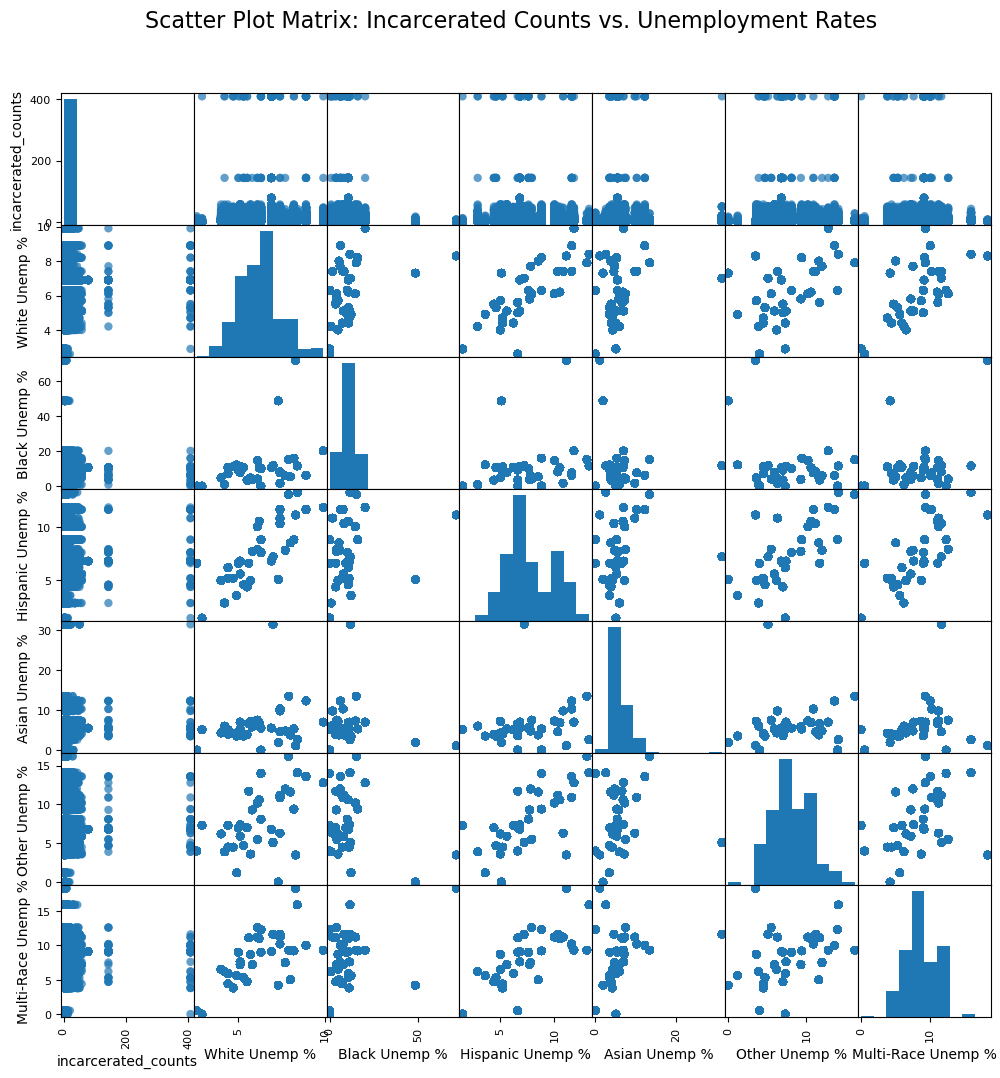

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select relevant columns
columns_of_interest = ['incarcerated_counts', 'White Unemp %', 'Black Unemp %', 'Hispanic Unemp %', 'Asian Unemp %', 'Other Unemp %', 'Multi-Race Unemp %']

# Create a subset of the DataFrame
subset_df = df[columns_of_interest]

# Create a scatter plot matrix
scatter_matrix(subset_df, alpha=0.7, figsize=(12, 12), diagonal='hist', grid=True, marker='o', cmap='viridis')

# Set the title
plt.suptitle('Scatter Plot Matrix: Incarcerated Counts vs. Unemployment Rates', y=0.95, fontsize=16)

# Display the plot
plt.show()

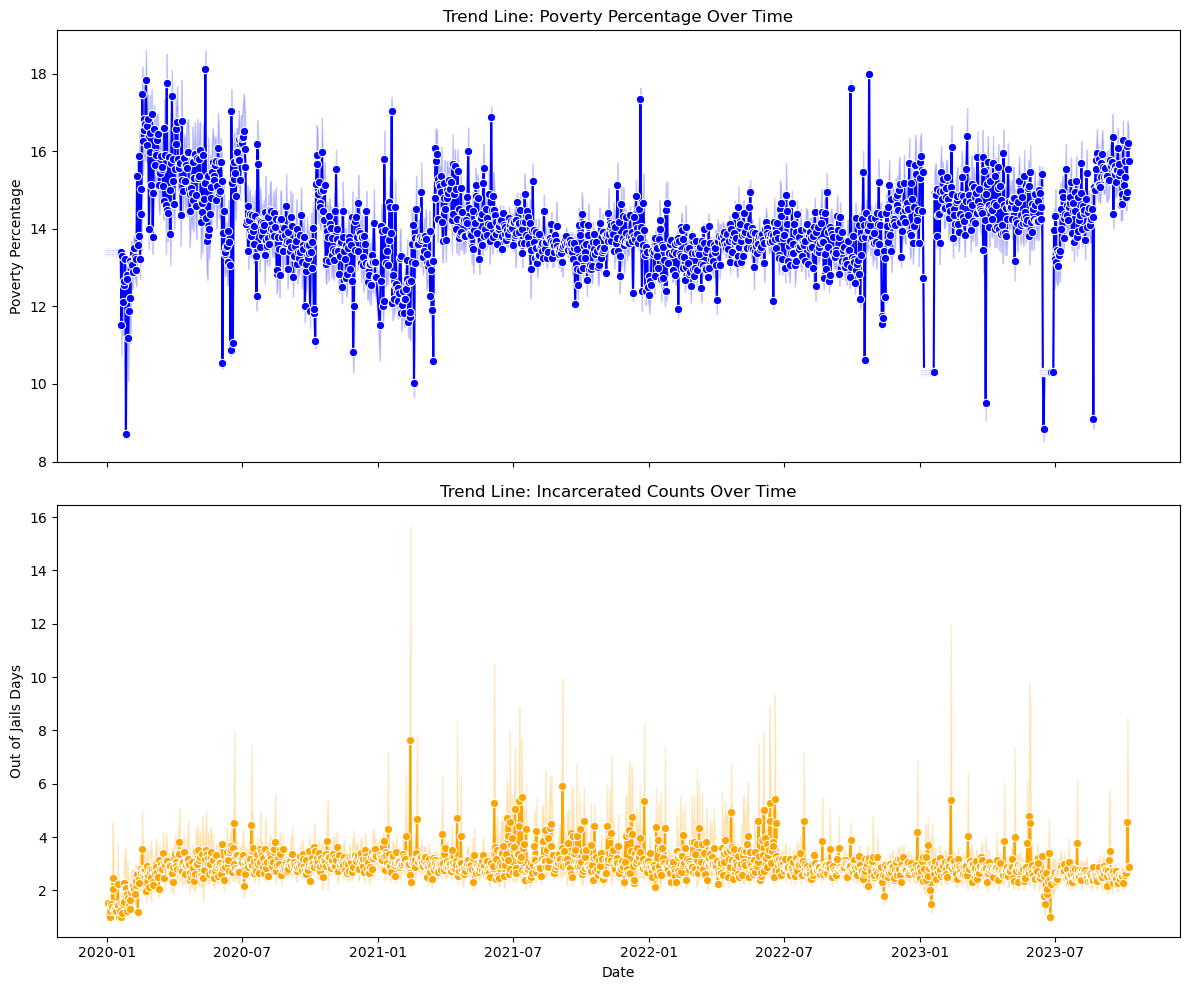

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Trend line for Poverty Percentage
sns.lineplot(ax=axes[0], x='date', y='Poverty %', data=df, marker='o', color='blue')
axes[0].set_title('Trend Line: Poverty Percentage Over Time')
axes[0].set_ylabel('Poverty Percentage')

# Trend line for Incarcerated Days
sns.lineplot(ax=axes[1], x='date', y='incarcerated_counts', data=df, marker='o', color='orange')
axes[1].set_title('Trend Line: Incarcerated Counts Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Out of Jails Days')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Re-incarcerations

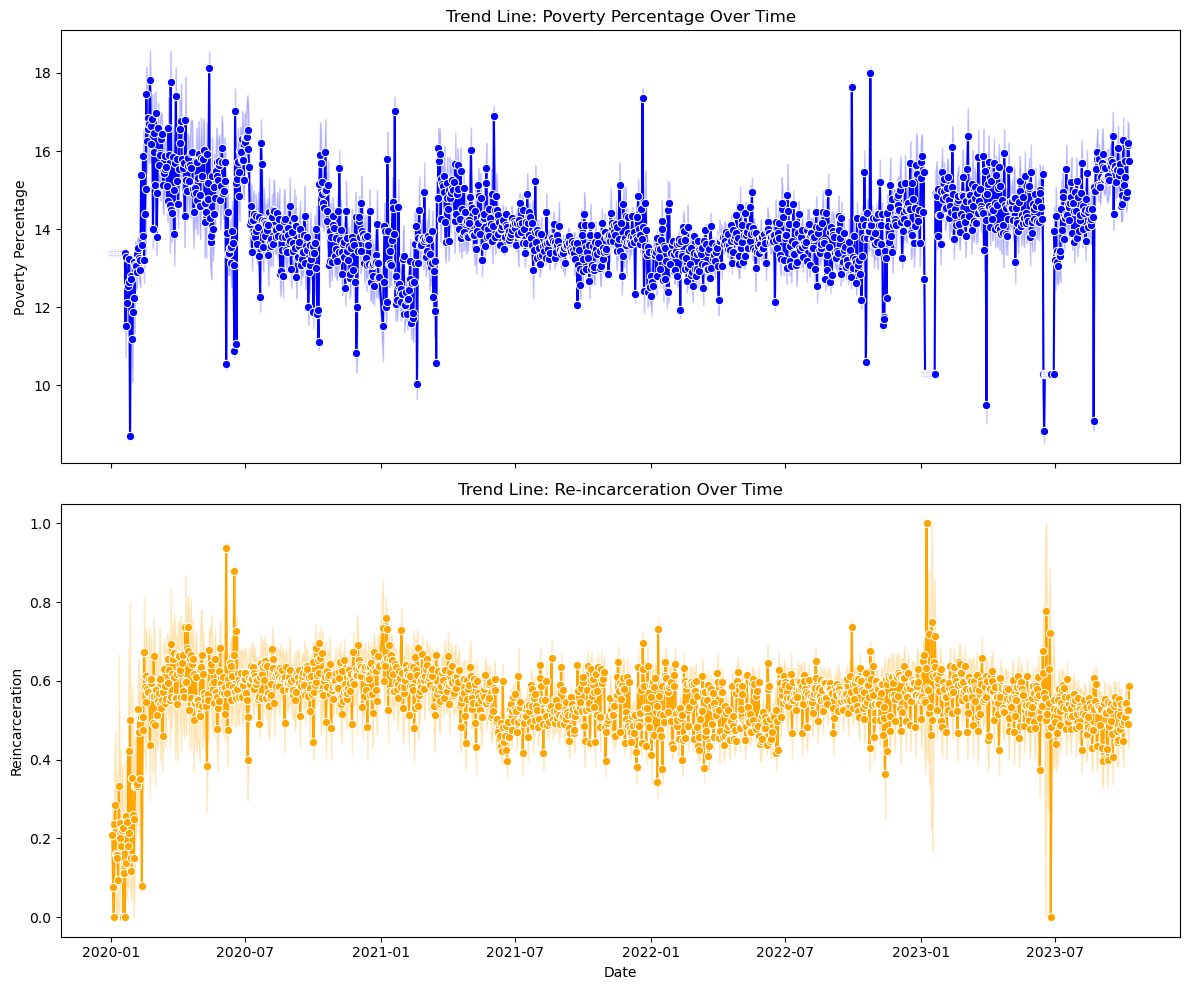

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Trend line for Poverty Percentage
sns.lineplot(ax=axes[0], x='date', y='Poverty %', data=df, marker='o', color='blue')
axes[0].set_title('Trend Line: Poverty Percentage Over Time')
axes[0].set_ylabel('Poverty Percentage')

# Trend line for Incarcerated Days
sns.lineplot(ax=axes[1], x='date', y='reincarceration', data=df, marker='o', color='orange')
axes[1].set_title('Trend Line: Re-incarceration Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Reincarceration')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

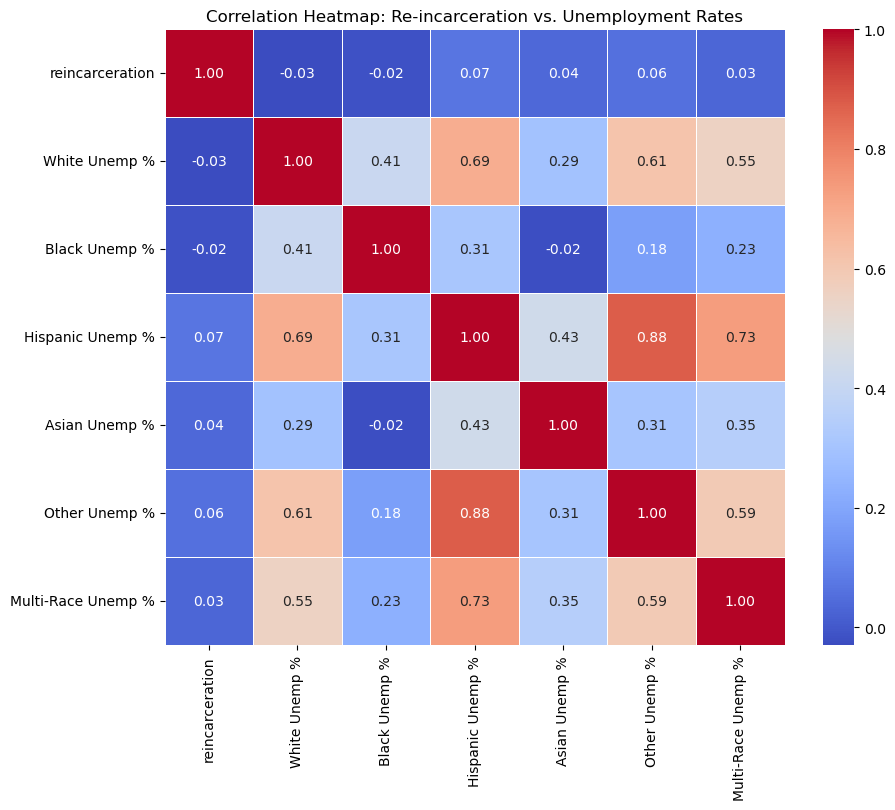

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
columns_of_interest = ['reincarceration', 'White Unemp %', 'Black Unemp %', 'Hispanic Unemp %', 'Asian Unemp %', 'Other Unemp %', 'Multi-Race Unemp %']

# Create a subset of the DataFrame
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set the title
plt.title('Correlation Heatmap: Re-incarceration vs. Unemployment Rates')

# Display the plot
plt.show()

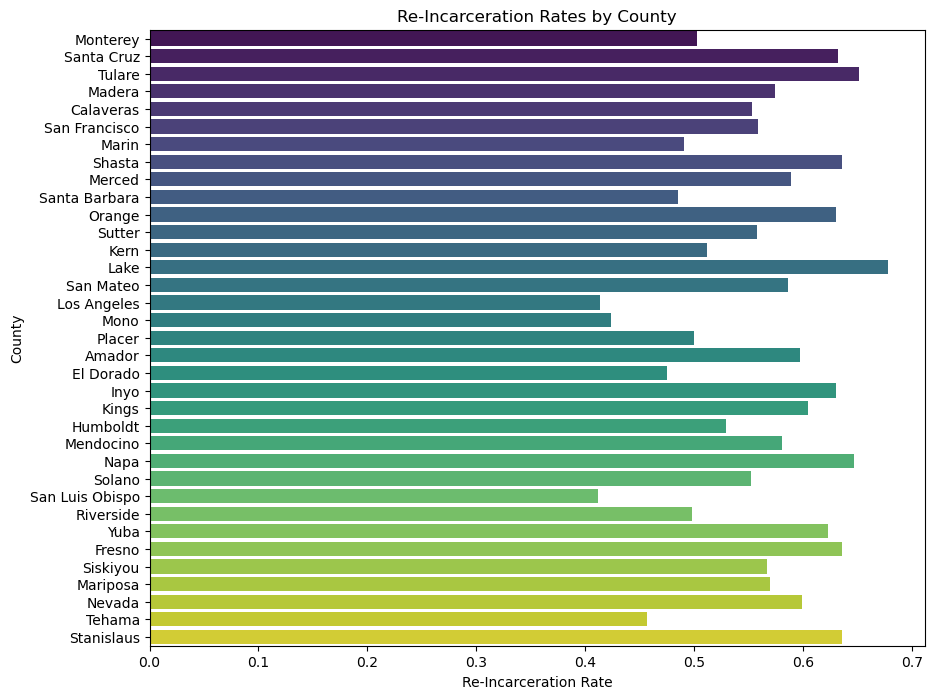

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate re-incarceration rates for each county
reincarceration_rates = df.groupby('county')['reincarceration'].mean().sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=reincarceration_rates, y=reincarceration_rates.index, palette='viridis')

# Set the title and labels
plt.title('Re-Incarceration Rates by County')
plt.xlabel('Re-Incarceration Rate')
plt.ylabel('County')

# Display the plot
plt.show()

# Re-incarceration in different counties

In [4]:
import pandas as pd

# Assuming you have your data in a DataFrame called df
# You can first group the data by 'nameFull' and count unique 'county' values for each group
reincarcerations_count = df.groupby('nameFull')['county'].nunique().reset_index()

# Create a new column 'reincarcerations_different_county' based on the count
reincarcerations_count['reincarcerations_different_county'] = (reincarcerations_count['county'] > 1).astype(int)

# Merge the result back into the original DataFrame based on 'nameFull'
df = df.merge(reincarcerations_count[['nameFull', 'reincarcerations_different_county']], on='nameFull', how='left')

# If a 'nameFull' value is repeated in different counties, the corresponding
# 'reincarcerations_different_county' value will be 1; otherwise, it will be 0.
display(df)

nameFull bookingNumber bookingDate caseNumber inmateNumber  \
0       (J) BENJAMIN HAYES           NaN  2022-09-24        NaN  202201668.0   
1        A ALEXANDER BARRY     6099253.0         NaT        NaN          NaN   
2                 A D WEBB     so2294642         NaT        NaN          NaN   
3                 A D WEBB     so2322685         NaT        NaN          NaN   
4              A D WEBB JR     so2334382         NaT        NaN          NaN   
...                    ...           ...         ...        ...          ...   
601256       ZYRC DAVIS JR     202123900  2021-06-17  210016757          NaN   
601257      ZYRON NEWHOUSE       6285273         NaT        NaN     40113763   
601258    ZYSEAN RAY WAFER     22-003686  2022-08-16        NaN        41599   
601259    ZYSEAN RAY WAFER     22-004084         NaT        NaN        41599   
601260     ZYSHONNE NAPIER           NaN  2020-09-03        NaN          NaN   

                                                 housing1 housing1a housing2  \
0                                           Napa Co. Jail       NaN      NaN   
1                                                 Unknown       NaN      NaN   
2       Kern County Central Receiving Facility; Kern C...       NaN      NaN   
3       Kern County Central Receiving Facility; Kern C...       NaN      NaN   
4       Kern County Central Receiving Facility; Kern C...       NaN      NaN   
...                                                   ...       ...      ...   
601256                     robert presley detention cente       NaN      NaN   
601257                                            Unknown       NaN      NaN   
601258           Kings Co. Jail; Kings County Branch Jail       NaN      NaN   
601259           Kings Co. Jail; Kings County Branch Jail       NaN      NaN   
601260                           adult pre-trial facility       NaN      NaN   

       housing3  nameLast  ... Female Unemp % LTHS Unemp %  HS Unemp %  \
0           NaN       NaN  ...            4.7          5.7         3.6   
1           NaN     barry  ...            6.8          6.8         6.9   
2           NaN      webb  ...            8.2         10.0         9.9   
3           NaN      webb  ...            8.2         10.0         9.9   
4           NaN      webb  ...            8.2         10.0         9.9   
...         ...       ...  ...            ...          ...         ...   
601256     23c8       NaN  ...            7.1          7.9         7.3   
601257      NaN  newhouse  ...            6.8          6.8         6.9   
601258      NaN       NaN  ...           10.0         12.9         8.3   
601259      NaN     wafer  ...           10.0         12.9         8.3   
601260      NaN       NaN  ...           10.6         15.4        12.2   

       SC/AD Unemp % Bach./Higher Unemp % Top Political time_gap  \
0                4.3                  3.4             D        0   
1                6.6                  5.0             D        0   
2                6.9                  2.6             R      450   
3                6.9                  2.6             R        0   
4                6.9                  2.6             R        0   
...              ...                  ...           ...      ...   
601256           5.7                  3.8             D        0   
601257           6.6                  5.0             D        0   
601258           7.3                  3.6             R       17   
601259           7.3                  3.6             R        0   
601260           5.9                  3.4             R        0   

       incarcerated_counts  reincarceration  reincarcerations_different_county  
0                        1                0                                  0  
1                        1                0                                  0  
2                        2                1                                  0  
3                        2                1                       

In [5]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'df' with the actual name of your DataFrame if it's different

# Create a new DataFrame with unique combinations of 'nameFull' and 'county'
unique_counties = df[['nameFull', 'county']].drop_duplicates()

# Merge the unique_counties DataFrame back to the original DataFrame
df = pd.merge(df, unique_counties.groupby('nameFull')['county'].apply(list).reset_index(), on='nameFull', how='left')

# Rename the new column to 'different_county'
df.rename(columns={'county_y': 'different_county'}, inplace=True)

# If you want the result as a comma-separated string instead of a list
df['different_county'] = df['different_county'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Create a copy of the original DataFrame
reincarcerated_df = df.copy()

# Compare 'different_county' with 'county' and keep rows where they are different
reincarcerated_df = reincarcerated_df[reincarcerated_df['different_county'] != reincarcerated_df['county_x']]

# Display the updated reincarcerated_df
display(reincarcerated_df)

nameFull bookingNumber bookingDate  caseNumber  \
133                AARON ALLEN  2021005879.0  2021-07-24    21-04759   
134                AARON ALLEN     202214258  2022-04-12   220009892   
146     AARON ANDREW BEARDSLEY           NaN         NaT         NaN   
147     AARON ANDREW BEARDSLEY     6401844.0  2022-06-19         NaN   
148     AARON ANDREW BEARDSLEY     202224439  2022-06-21  rif1902966   
...                        ...           ...         ...         ...   
601140     ZORA MARIE GRIFFITH           NaN  2022-01-16         NaN   
601141     ZORA MARIE GRIFFITH           NaN  2023-02-14         NaN   
601142     ZORA MARIE GRIFFITH       81161.0  2023-03-11         NaN   
601160           ZSOLT BENEDEK           NaN  2022-03-29         NaN   
601161           ZSOLT BENEDEK           NaN  2022-03-31         NaN   

       inmateNumber                           housing1 housing1a housing2  \
133        265020.0  justice center detention facility       NaN      NaN   
134             NaN         southwest detention center       NaN      NaN   
146             NaN                            Unknown       NaN      NaN   
147        30731467            inmate reception center       irc      NaN   
148             NaN     robert presley detention cente       NaN      NaN   
...             ...                                ...       ...      ...   
601140          NaN                 Calaveras Co. Jail       NaN      NaN   
601141          NaN                 Calaveras Co. Jail       NaN      NaN   
601142          NaN                    Amador Co. Jail       NaN      NaN   
601160    p00237993                     Marin Co. Jail       NaN      NaN   
601161          NaN                    Placer Co. Jail       NaN      NaN   

       housing3   nameLast  ... LTHS Unemp % HS Unemp %  SC/AD Unemp %  \
133         NaN        NaN  ...          8.0        6.4            4.9   
134        eh43        NaN  ...          7.9        7.3            5.7   
146         NaN        NaN  ...          5.5        5.8            5.2   
147         NaN  beardsley  ...          6.8        6.9            6.6   
148        4b56        NaN  ...          7.9        7.3            5.7   
...         ...        ...  ...          ...        ...            ...   
601140      NaN        NaN  ...          8.6        5.0            6.6   
601141      NaN        NaN  ...          8.6        5.0            6.6   
601142      NaN        NaN  ...          3.4        6.0            5.0   
601160      NaN        NaN  ...          2.5        3.9            6.2   
601161        g        NaN  ...          5.7        3.9            4.0   

       Bach./Higher Unemp % Top Political time_gap incarcerated_counts  \
133                     3.0             D      261                   2   
134                     3.8             D        0                   2   
146                     3.7             R      644                   4   
147                     5.0             D        2                   4   
148                     3.8             D        6                   4   
...                     ...           ...      ...                 ...   
601140                 10.7             R      391                   3   
601141                 10.7             R        1                   3   
601142                  8.7             R        0                   3   
601160                  3.5             D        1                   2   
601161                  2.6             R        0                   2   

       reincarceration  reincarcerations_different_county  \
133                  1                                  1   
134                  1                                  1   
146                  1                                  1   
147                  1                                  1   
148                  1                                  1   
...                ...                                ...   
601140               1     

In [6]:
# Drop rows with the same 'different_county' and 'nameFull'
reincarcerated_df.drop_duplicates(subset=['different_county', 'nameFull'], keep='first', inplace=True)

# Display the updated reincarcerated_df
display(reincarcerated_df)

nameFull bookingNumber bookingDate caseNumber  \
133                     AARON ALLEN  2021005879.0  2021-07-24   21-04759   
146          AARON ANDREW BEARDSLEY           NaN         NaT        NaN   
201                  AARON ARENIVAZ     2020649.0  2020-06-21        NaN   
228            AARON BENJAMIN LEWIS       6196560  2021-06-12        NaN   
260                     AARON BROWN           NaN         NaT        NaN   
...                             ...           ...         ...        ...   
601084       ZOE ELIZABETH RUTLEDGE           NaN  2021-11-19        NaN   
601112  ZOILA ELIZABETH COVARRUBIAS       6284843  2021-12-02        NaN   
601134          ZOLTON LEE MITCHELL      263979.0  2021-10-25        NaN   
601140          ZORA MARIE GRIFFITH           NaN  2022-01-16        NaN   
601160                ZSOLT BENEDEK           NaN  2022-03-29        NaN   

       inmateNumber                           housing1 housing1a housing2  \
133        265020.0  justice center detention facility       NaN      NaN   
146             NaN                            Unknown       NaN      NaN   
201       7049501.0                 Fresno County Jail       NaN      NaN   
228             NaN                            Unknown       NaN      NaN   
260             NaN  merced county sheriff's main jail       NaN      NaN   
...             ...                                ...       ...      ...   
601084          NaN           adult pre-trial facility       NaN      NaN   
601112     11777762                            Unknown       NaN      NaN   
601134          NaN                      Yuba Co. Jail       NaN      NaN   
601140          NaN                 Calaveras Co. Jail       NaN      NaN   
601160    p00237993                     Marin Co. Jail       NaN      NaN   

          housing3     nameLast  ... LTHS Unemp % HS Unemp %  SC/AD Unemp %  \
133            NaN          NaN  ...          8.0        6.4            4.9   
146            NaN          NaN  ...          5.5        5.8            5.2   
201     mj, 05, 0d          NaN  ...         11.1        9.2            7.5   
228            NaN        lewis  ...          6.8        6.9            6.6   
260            NaN          NaN  ...         11.6       11.6            8.0   
...            ...          ...  ...          ...        ...            ...   
601084         NaN          NaN  ...         15.4       12.2            5.9   
601112         NaN  covarrubias  ...          6.8        6.9            6.6   
601134         NaN          NaN  ...          9.2        3.5            7.4   
601140         NaN          NaN  ...          8.6        5.0            6.6   
601160         NaN          NaN  ...          2.5        3.9            6.2   

       Bach./Higher Unemp % Top Political time_gap incarcerated_counts  \
133                     3.0             D      261                   2   
146                     3.7             R      644                   4   
201                     3.4             D      309                   5   
228                     5.0             D      177                   2   
260                     3.9             D      -99                   8   
...                     ...           ...      ...                 ...   
601084                  3.4             R      154                   2   
601112                  5.0             D        0                   2   
601134                  2.6             R      652                   4   
601140                 10.7             R      391                   3   
601160                  3.5             D        1                   2   

       reincarceration  reincarcerations_different_county  \
133                  1                                  1   
146                  1                                  1   
201                  1                                  1   
228                  1                                  1   
260                  1                        

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming reincarcerated_df is your DataFrame

# Count the occurrences of each unique value in 'different_county'
different_county_counts = reincarcerated_df['different_county'].value_counts()

# Display the counts
print("Different County Counts:")
# Display all values without truncation
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    display(different_county_counts)

Different County Counts:


different_county
Orange, Los Angeles                                                                                                                             1215
Los Angeles, Orange                                                                                                                              892
Orange, Riverside                                                                                                                                734
Los Angeles, Riverside                                                                                                                           647
Los Angeles, Kern                                                                                                                                563
Riverside, Los Angeles                                                                                                                           482
San Mateo, San Francisco                                                                 

In [8]:
# Filter values larger than 1
filtered_counts = different_county_counts[different_county_counts > 100]
display(filtered_counts)

different_county
Orange, Los Angeles           1215
Los Angeles, Orange            892
Orange, Riverside              734
Los Angeles, Riverside         647
Los Angeles, Kern              563
Riverside, Los Angeles         482
San Mateo, San Francisco       392
Riverside, Orange              381
Fresno, Los Angeles            334
Los Angeles, Fresno            320
Kern, Los Angeles              286
Yuba, Sutter                   235
Tulare, Fresno                 231
Solano, Napa                   214
Tulare, Los Angeles            210
Tulare, Kern                   202
San Francisco, San Mateo       197
Fresno, Madera                 191
Fresno, Kern                   164
Fresno, Tulare                 152
Madera, Fresno                 150
Stanislaus, Merced             147
Tulare, Kings                  143
Orange, Kern                   127
Merced, Stanislaus             125
Kings, Fresno                  123
El Dorado, Placer              121
Fresno, Kings                  116
Sut

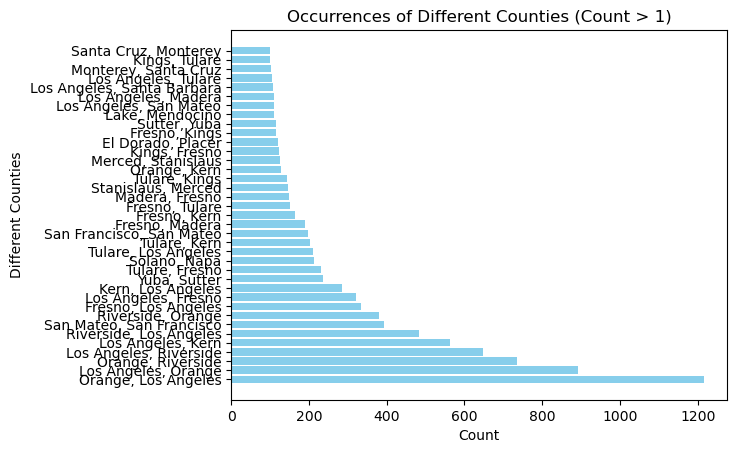

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming reincarcerated_df is your DataFrame

# Count the occurrences of each unique value in 'different_county'
different_county_counts = reincarcerated_df['different_county'].value_counts()


# Create a horizontal bar chart
plt.barh(filtered_counts.index, filtered_counts, color='skyblue')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Different Counties')
plt.title('Occurrences of Different Counties (Count > 1)')

# Show the plot
plt.show()

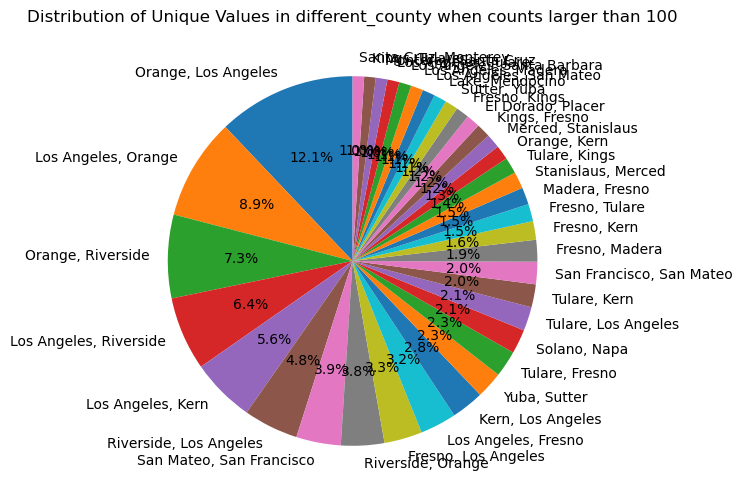

In [17]:
import matplotlib.pyplot as plt

# Filter values larger than 1
filtered_counts = different_county_counts[different_county_counts > 100]

# Assuming 'different_county_counts' is a pandas Series with unique values as index and counts as values
filtered_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 6))
plt.title('Distribution of Unique Values in different_county when counts larger than 100')
plt.ylabel('')  # Remove the default ylabel which contains column name
plt.show()

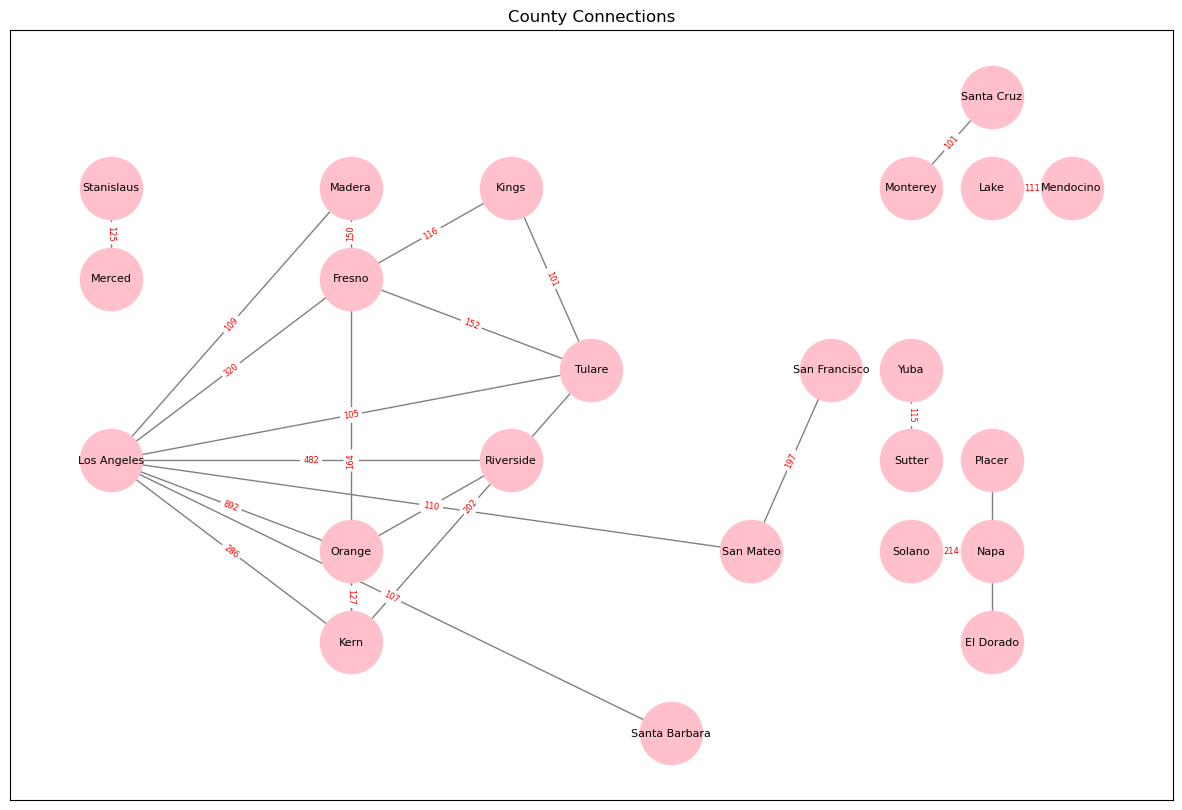

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.Graph()

# Add edges and edge weights
for edge, weight in filtered_counts.items():
    counties = edge.split(', ')
    G.add_edge(counties[0], counties[1], weight=weight)

fixed_node_positions = {
    'Orange': (400, 100),
    'Los Angeles': (250, 150),
    'Riverside': (500, 150),
    'San Mateo': (650, 100),
    'San Francisco': (700, 200),
    'Kern': (400, 50),
    'Yuba': (750, 200),
    'Tulare': (550, 200),
    'Solano': (750, 100),
    'Napa': (800, 100),
    'Madera': (400, 300),
    'Stanislaus': (250, 300),
    'Merced': (250, 250),
    'Kings': (500, 300),
    'El Dorado': (800, 50),
    'Placer': (800, 150),
    'Fresno': (400, 250),
    'Sutter': (750, 150),
    'Lake': (800, 300),
    'Mendocino': (850, 300),
    'Santa Barbara': (600, 0),
    'Monterey': (750, 300),
    'Santa Cruz': (800, 350)
    # Add positions for other counties...
}

# Set the figure size
plt.figure(figsize=(15, 10))  # Adjust the width and height as needed

# Draw nodes
nx.draw_networkx_nodes(G, pos=fixed_node_positions, node_size=2000, node_color='pink')

# Draw edges with counts
nx.draw_networkx_edges(G, pos=fixed_node_positions, width=1.0, edge_color='gray')

# Draw labels on nodes
nx.draw_networkx_labels(G, pos=fixed_node_positions, font_size=8, font_color='black')

# Draw edge labels (counts)
edge_labels = {(county1, county2): str(weight) for (county1, county2, weight) in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos=fixed_node_positions, edge_labels=edge_labels, font_color='red', font_size=6)

plt.title("County Connections")
plt.show()

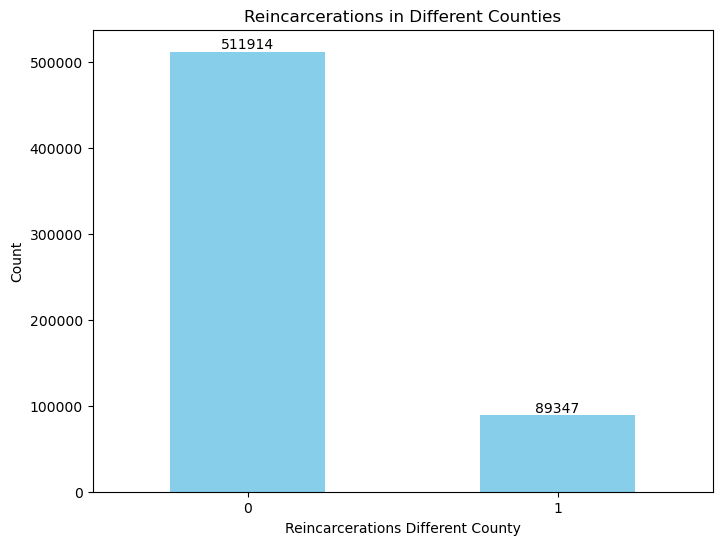

In [25]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'reincarcerations_different_county' column as described in the previous answer
# If not, make sure to calculate it before creating the plot

# Group the data by 'reincarcerations_different_county' and count the occurrences
count_data = df['reincarcerations_different_county'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
count_data.plot(kind='bar', color='skyblue')
plt.title('Reincarcerations in Different Counties')
plt.xlabel('Reincarcerations Different County')
plt.ylabel('Count')

# Add labels to the bars
for i, count in enumerate(count_data):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

<Figure size 5000x5000 with 0 Axes>

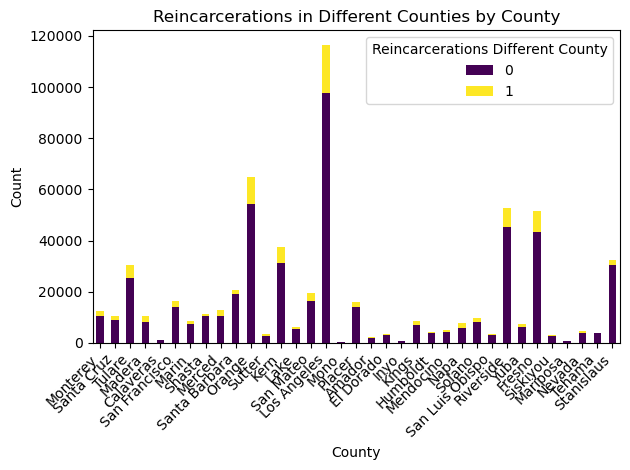

In [28]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'reincarcerations_different_county' column as described in the previous answer
# If not, make sure to calculate it before creating the plot

# Group the data by 'county' and calculate the count of each value for 'reincarcerations_different_county'
county_counts = df.groupby('county')['reincarcerations_different_county'].value_counts().unstack(fill_value=0)

# Create a bar chart with multiple bars, one for each county
plt.figure(figsize=(50, 50))
county_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Reincarcerations in Different Counties by County')
plt.xlabel('County')
plt.ylabel('Count')

plt.legend(title='Reincarcerations Different County', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
display(county_counts)

reincarcerations_different_county      0      1
county                                         
Monterey                           10546   1926
Santa Cruz                          9068   1630
Tulare                             25523   4774
Madera                              8051   2478
Calaveras                           1030    272
San Francisco                      13888   2538
Marin                               7516   1132
Shasta                             10531    920
Merced                             10652   2053
Santa Barbara                      19143   1389
Orange                             54405  10544
Sutter                              2508    954
Kern                               31387   6053
Lake                                5242    993
San Mateo                          16372   3110
Los Angeles                        97715  18673
Mono                                 435     65
Placer                             14046   1791
Amador                              1936    458
El Dorado                           2961    483
Inyo                                 742    105
Kings                               6807   1803
Humboldt                            3948    309
Mendocino                           4335    710
Napa                                5956   1722
Solano                              8060   1675
San Luis Obispo                     2948    407
Riverside                          45300   7404
Yuba                                6014   1458
Fresno                             43327   8264
Siskiyou                            2582    418
Mariposa                             598    173
Nevada                              3929    615
Tehama                              3874     35
Stanislaus                         30539   2013

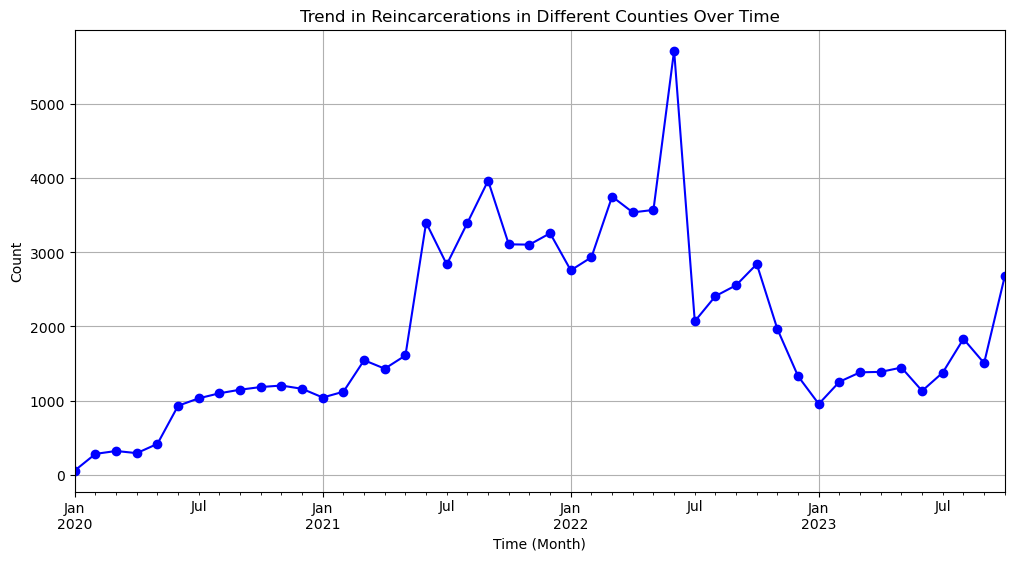

In [30]:
import matplotlib.pyplot as plt

# Group the data by 'bookingDate' and calculate the count of each value for 'reincarcerations_different_county' in each month
trend_data = df.groupby(df['date'].dt.to_period('M'))['reincarcerations_different_county'].sum()

# Create a line chart to visualize the trend
plt.figure(figsize=(12, 6))
trend_data.plot(marker='o', linestyle='-', color='b')
plt.title('Trend in Reincarcerations in Different Counties Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

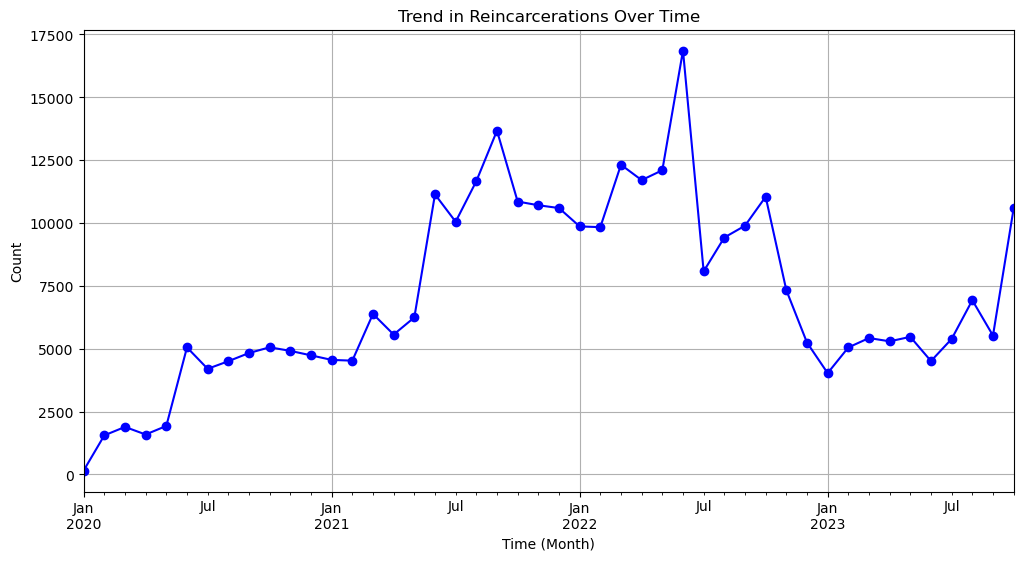

In [31]:
import matplotlib.pyplot as plt

# Group the data by 'bookingDate' and calculate the count of each value for 'reincarcerations_different_county' in each month
trend_data = df.groupby(df['date'].dt.to_period('M'))['reincarceration'].sum()

# Create a line chart to visualize the trend
plt.figure(figsize=(12, 6))
trend_data.plot(marker='o', linestyle='-', color='b')
plt.title('Trend in Reincarcerations Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

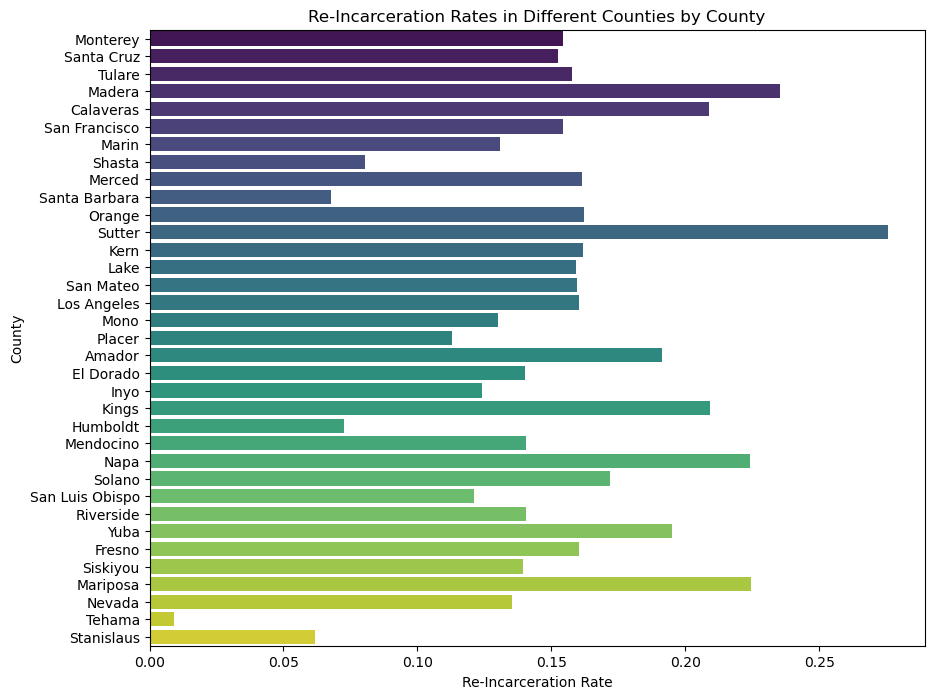

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate re-incarceration rates for each county
reincarceration_rates = df.groupby('county')['reincarcerations_different_county'].mean().sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=reincarceration_rates, y=reincarceration_rates.index, palette='viridis')

# Set the title and labels
plt.title('Re-Incarceration Rates in Different Counties by County')
plt.xlabel('Re-Incarceration Rate')
plt.ylabel('County')

# Display the plot
plt.show()